In [1]:
import pandas as pd
from pandas.api.types import CategoricalDtype
from functools import reduce

In [2]:
questions = pd.read_csv("questions.csv", na_values=["", "NA", "NULL"])
questionposts = pd.read_csv("questionposts.csv", na_values=["", "NA", "NULL"])

In [3]:
questions_cat = questions.loc[:, ["QuestionUno", "Category", "Subcategory"]]

In [4]:
questionposts_cat = pd.merge(questionposts, questions_cat, on="QuestionUno", how="left")

In [5]:
questionposts_cat.head()

,Id,StateAbbr,QuestionUno,CreatedUtc,PostText,Category,Subcategory
0,1,AK,B7C95D50-6C81-4E61-BC16-81077B7D3F7E,2018-04-25T18:09:30Z,Do you still need help with this issue? It ha...,Housing and Homelessness,Housing or Property Owned
1,2,AK,C579CE49-6B7A-44E7-A203-5D3E52623804,2018-04-17T21:15:28Z,Anyone?,Housing and Homelessness,Housing or Property Owned
2,3,AK,F3A78AD3-D3D4-447F-BEAF-F62F1D1D4CCE,2018-04-18T17:51:41Z,Yes those are the right forms. Im sorry I did...,Family and Children,Family/Divorce/Custody
3,4,AK,5F8506D3-D9F1-48EE-8081-D30259DBF4E8,2018-04-18T22:15:44Z,Hi You do make some good points. The differen...,Other,Other
4,5,AK,B4C814C9-8983-413F-8BC4-F2BE01665555,2018-04-12T10:52:50Z,My father passed away and I have DNA test resu...,Family and Children,Wills/Inheritance


In [6]:
questionposts_cat.groupby('Category').agg(n=('Category', 'count')).sort_values('n', ascending=False)


,n
Category,
Family and Children,165304
Housing and Homelessness,79937
Other,72978
Consumer Financial Questions,37523
"Work, Employment and Unemployment",21535
Individual Rights,16241
Health and Disability,5105
Income Maintenance,4857
Education,1408


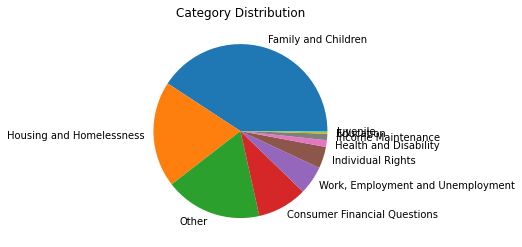

In [7]:
import matplotlib.pyplot as plt

# Create the data for the pie chart
data = questionposts_cat.groupby('Category').agg(n=('Category', 'count')).sort_values('n', ascending=False)

# Create the pie chart
plt.pie(data['n'], labels=data.index)

# Add a title
plt.title('Category Distribution')

# Display the pie chart
plt.show()


In [8]:
questionposts_cat.groupby('Subcategory').agg(n=('Subcategory', 'count')).sort_values('n', ascending=False)

,n
Subcategory,
Family/Divorce/Custody,70251
Other,40700
Housing or Property Owned,22037
Debts & Purchases,18896
Family/Divorce/Custody/Adoption,18377
...,...
Immigration - Green Cards - DV Lottery & Other,1
Hurricane Florence - Lost Documents,1
School Discipline (including Expulsion and Suspension),1


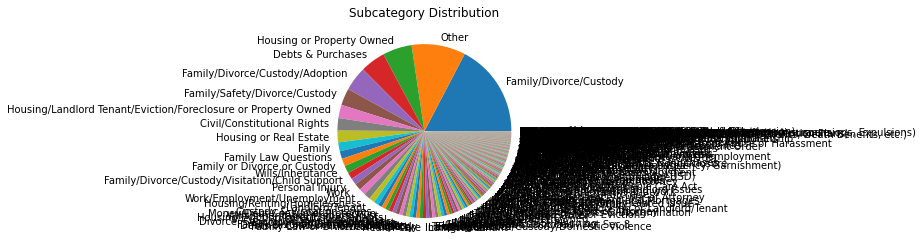

In [9]:
# Create the data for the pie chart
data = questionposts_cat.groupby('Subcategory').agg(n=('Subcategory', 'count')).sort_values('n', ascending=False)

# Create the pie chart
plt.pie(data['n'], labels=data.index)

# Add a title
plt.title('Subcategory Distribution')

# Display the pie chart
plt.show()

In [10]:
# filter the dataframe by category "Family and Children"
filtered_df = questionposts_cat[questionposts_cat['Category'] == "Family and Children"]

# group by subcategory and count the number of posts
grouped_df = filtered_df.groupby('Subcategory').agg(n=('Subcategory', 'count')).reset_index()

# sort the dataframe by the count column in descending order
sorted_df = grouped_df.sort_values('n', ascending=False)

# display the sorted dataframe
print(sorted_df)

                                          Subcategory      n
23                             Family/Divorce/Custody  70251
25                    Family/Divorce/Custody/Adoption  18377
29                      Family/Safety/Divorce/Custody  12713
18                                             Family   6707
20                               Family Law Questions   5802
22                       Family or Divorce or Custody   5789
50                                  Wills/Inheritance   5716
28    Family/Divorce/Custody/Visitation/Child Support   5041
6                         Custody & Visitation issues   3708
52                    Wills/Inheritance/Probate/Trust   2914
10               Divorce, Separation, Annulment Cases   2747
27                   Family/Divorce/Custody/Paternity   2601
21                   Family Law or Divorce or Custody   2543
26           Family/Divorce/Custody/Domestic Violence   2252
5                                       Child Support   1596
19                      

In [11]:
questionposts_cat.groupby(['StateAbbr', 'Category', 'Subcategory']).agg(n=('StateAbbr', 'count')).sort_values('StateAbbr')

n
StateAbbr Category                          Subcategory                   
AK        Consumer Financial Questions      COVID-19â€”Consumer          4
          Work, Employment and Unemployment Worker's Comp                3
                                            Work                        29
          Other                             Personal Injury             38
                                            Other                      260
...                                                                    ...
WY        Consumer Financial Questions      Debts & Purchases          193
                                            Bankruptcy                  43
          Other                             Personal Injury             29
          Housing and Homelessness          Housing or Property Owned  411
          Work, Employment and Unemployment Work                        93

[814 rows x 1 columns]

In [12]:
text = questionposts_cat['PostText']
text = text.astype(str)

In [13]:
text.head()

0    Do you still need help with this issue?  It ha...
1                                              Anyone?
2    Yes those are the right forms.  Im sorry I did...
3    Hi You do make some good points.  The differen...
4    My father passed away and I have DNA test resu...
Name: PostText, dtype: object

In [14]:
# print(len(text))

In [15]:
# Import required libraries
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [16]:
# Define stop words
stop_words = set(stopwords.words('english'))

In [17]:
# Define a function to preprocess the text data
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stop words
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # Join the filtered tokens
    preprocessed_text = ' '.join(filtered_tokens)
    return preprocessed_text

In [18]:
# Preprocess the text data
text = text.apply(preprocess_text)

In [19]:
# Combine all preprocessed text
combined_text = ' '.join(text.tolist())
# custom_stopwords = set(['said', 'just', 'like', 'would'])
# stopwords = stopwords.union(custom_stopwords)

In [20]:
# # Generate the word cloud
# wordcloud = WordCloud(background_color='white', width=800, height=400).generate(combined_text)
# #
# # Display the word cloud
# plt.figure(figsize=(12,10))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.show()

In [21]:
# Generate a word frequency table
word_freq = nltk.FreqDist(word_tokenize(combined_text))
df_word_freq = pd.DataFrame(list(word_freq.items()), columns=['Word', 'Frequency'])

# Sort the word frequency table in descending order of frequency
df_word_freq = df_word_freq.sort_values('Frequency', ascending=False)

# Display the word frequency table
print(df_word_freq)

df_word_freq.head()

                                                   Word  Frequency
8                                                     .    2353574
4                                                     ?     297329
147                                               court     255054
43                                                would     232191
16                                                  get     164009
...                                                 ...        ...
185447                                         named.in          1
185443                       httpstbclerk.comcivilforms          1
185442                                        websitest          1
185441  httpswww.louisianafamilyandelderlaw.comsouthern          1
407316                                            rkkii          1

[407317 rows x 2 columns]


,Word,Frequency
8,.,2353574
4,?,297329
147,court,255054
43,would,232191
16,get,164009


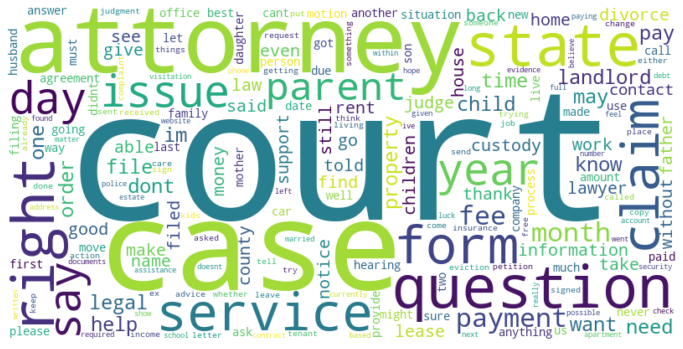

In [22]:
df_word_freq = df_word_freq[1:300]
combined_text = ' '.join(df_word_freq["Word"].tolist())
# Generate the word cloud
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(combined_text)

# Display the word cloud
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

only noun

In [23]:
# import nltk
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
# from nltk.stem import WordNetLemmatizer
# from wordcloud import WordCloud
# import matplotlib.pyplot as plt

# # Define stop words
# stop_words = set(stopwords.words('english'))

# # Define a function to preprocess the text data
# def preprocess_text(text):
#     # Convert to lowercase
#     text = text.lower()
#     # Tokenize the text
#     tokens = word_tokenize(text)
#     # Remove stop words and keep only nouns
#     filtered_tokens = [token for (token, pos) in nltk.pos_tag(tokens) if (token not in stop_words) and (pos.startswith('N'))]
#     # Lemmatize the filtered tokens
#     lemmatizer = WordNetLemmatizer()
#     filtered_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
#     # Join the filtered tokens
#     preprocessed_text = ' '.join(filtered_tokens)
#     return preprocessed_text

# # Preprocess the text data
# text = text.apply(preprocess_text)

# # Combine all preprocessed text
# combined_text = ' '.join(text.tolist())

# # Generate the word cloud
# wordcloud = WordCloud(background_color='white', width=800, height=400).generate(combined_text)

# # Display the word cloud
# plt.figure(figsize=(12,10))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.show()


The frequency and sentiment of words used in the client-lawyer exchange 

In [24]:
# !pip install textblob 
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from textblob import TextBlob

# Create a corpus of the post texts
corpus = questionposts_cat["PostText"]
corpus = corpus.astype(str)

# Preprocess the text
stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")

def preprocess(text):
    text = text.lower()
    text = " ".join([stemmer.stem(word) for word in text.split() if word not in stop_words])
    return text

corpus = corpus.apply(preprocess)

# Create a document term matrix
vectorizer = CountVectorizer(min_df=50)
dtm = vectorizer.fit_transform(corpus)

# Find the most frequent words
freq_words = vectorizer.get_feature_names()

# Create a dataframe of the frequency of each word
word_freq = pd.DataFrame(data={"word": freq_words, "freq": dtm.sum(axis=0).tolist()[0]})

# Order the dataframe by frequency
word_freq = word_freq.sort_values("freq", ascending=False)

# Print the results
print(word_freq)

                              word    freq
2084                         court  279070
9315                         would  232581
3383                          file  203257
3699                           get  201573
5543                          need  180006
...                            ...     ...
2092                      courtnow      50
4266                       imagine      50
4147               housingcommerci      50
4148  housingcondominiumsresidenti      50
2313                    deductpubl      50

[9389 rows x 2 columns]


In [25]:
import pandas as pd
from textblob import TextBlob

text = questionposts_cat["PostText"]
text = text.astype(str)

# Define a function to get the sentiment score of each sentence
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply the function to the conversation data
text['sentiment_score'] = text.apply(lambda x: get_sentiment(x))

# Define a function to classify the sentiment based on the score
def classify_sentiment(score):
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply the function to the sentiment scores
text['sentiment'] = text['sentiment_score'].apply(classify_sentiment)

# Print the sentiment analysis results
print(text[['sentiment_score', 'sentiment']])


sentiment_score    0        -0.187500
1         0.000000
2       ...
sentiment          0         negative
1          neutral
2       ...
Name: PostText, dtype: object


In [26]:
# Get the frequency of each sentiment value
sentiment_counts = text['sentiment'].value_counts()

# Create a DataFrame with the sentiment counts
sentiment_df = pd.DataFrame({
    'Sentiment': sentiment_counts.index,
    'Count': sentiment_counts.values
})

# Print the DataFrame
print(sentiment_df)

  Sentiment   Count
0  positive  259492
1  negative   88398
2   neutral   57577
